In [1]:
import numpy as np
import clmm
import sys
sys.path.append('./support')
import mock_data as mock

#### Define the cosmology object, either using pyccl or astropy - comment/uncomment as appropriate

In [2]:
## Define a CCL-like cosmology object from pyccl
# import pyccl as ccl
# cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)


# Define a Atropy-like cosmology object from astropy cosmology
from astropy.cosmology import FlatLambdaCDM
astropy_cosmology_object = FlatLambdaCDM(H0=70, Om0=0.27, Ob0=0.045)
cosmo = clmm.cclify_astropy_cosmo(astropy_cosmology_object)

#### Preparing config for mock data generation

Mock data will include shape noise, galaxies from redshift distribution and a pdz for each galaxies

In [19]:
config={}
config['cluster_id'] = 'mock cluster'
config['cluster_m'] = 1.e15
config['cluster_z'] = 0.3
config['src_z'] = 0.8
config['concentration'] = 4
config['ngals'] = 10000
config['Delta'] = 200
config['cosmo'] = cosmo

noisy_data_z = mock.MockData(config=config)
noisy_data_z.generate(is_shapenoise=True, is_zdistribution=True, is_zerr=True)

In [20]:
noisy_data_z.catalog[0:3]

<Table length=3>
  id           ra          ...               z_bins [34]               
int64       float64        ...                 float64                 
----- -------------------- ... ----------------------------------------
    0  -0.2363222407499571 ... 0.9673533527760723 .. 1.9573533527760731
    1 -0.17645825764792297 ... 0.8949131143504925 .. 1.8849131143504934
    2 -0.06314409235725608 ...   1.140654527597231 .. 2.130654527597232

#### Loading this into a CLMM cluster object

In [21]:
# At the moment mock data only allow for a cluster centred on (0,0)
cluster_ra = 0.0
cluster_dec = 0.0
gc_object = clmm.GalaxyCluster(config['cluster_id'], cluster_ra, cluster_dec, 
                             config['cluster_z'], noisy_data_z.catalog)

#### Saving the GC object 

In [22]:
gc_object.save("GC_from_mock_data.pkl")

#### Checking ellipicities

(-0.2, 0.2)

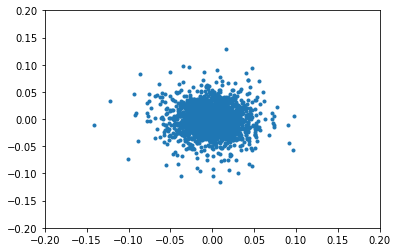

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(gc_object.galcat['e1'],gc_object.galcat['e2'], marker='.')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)